In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle
import os

In [2]:
df = pd.read_csv("../data/processed/feature_engineered_data.csv")
df.shape

(6216, 119)

In [3]:
X = df.drop(['price', 'price_per_sqft', 'log_price'], axis=1)
y = df['price']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

Training set: (4972, 116)
Testing set: (1244, 116)


In [5]:
dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)
dt_model.fit(X_train, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_lea

In [6]:
y_pred = dt_model.predict(X_test)

In [7]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"R2 Score: {r2:.4f}")
print(f"MAE: {mae:.4f} Lakhs")
print(f"RMSE: {rmse:.4f} Lakhs")
print(f"MAPE: {mape:.2f}%")

R2 Score: 0.9132
MAE: 14.8865 Lakhs
RMSE: 23.4725 Lakhs
MAPE: 19.12%


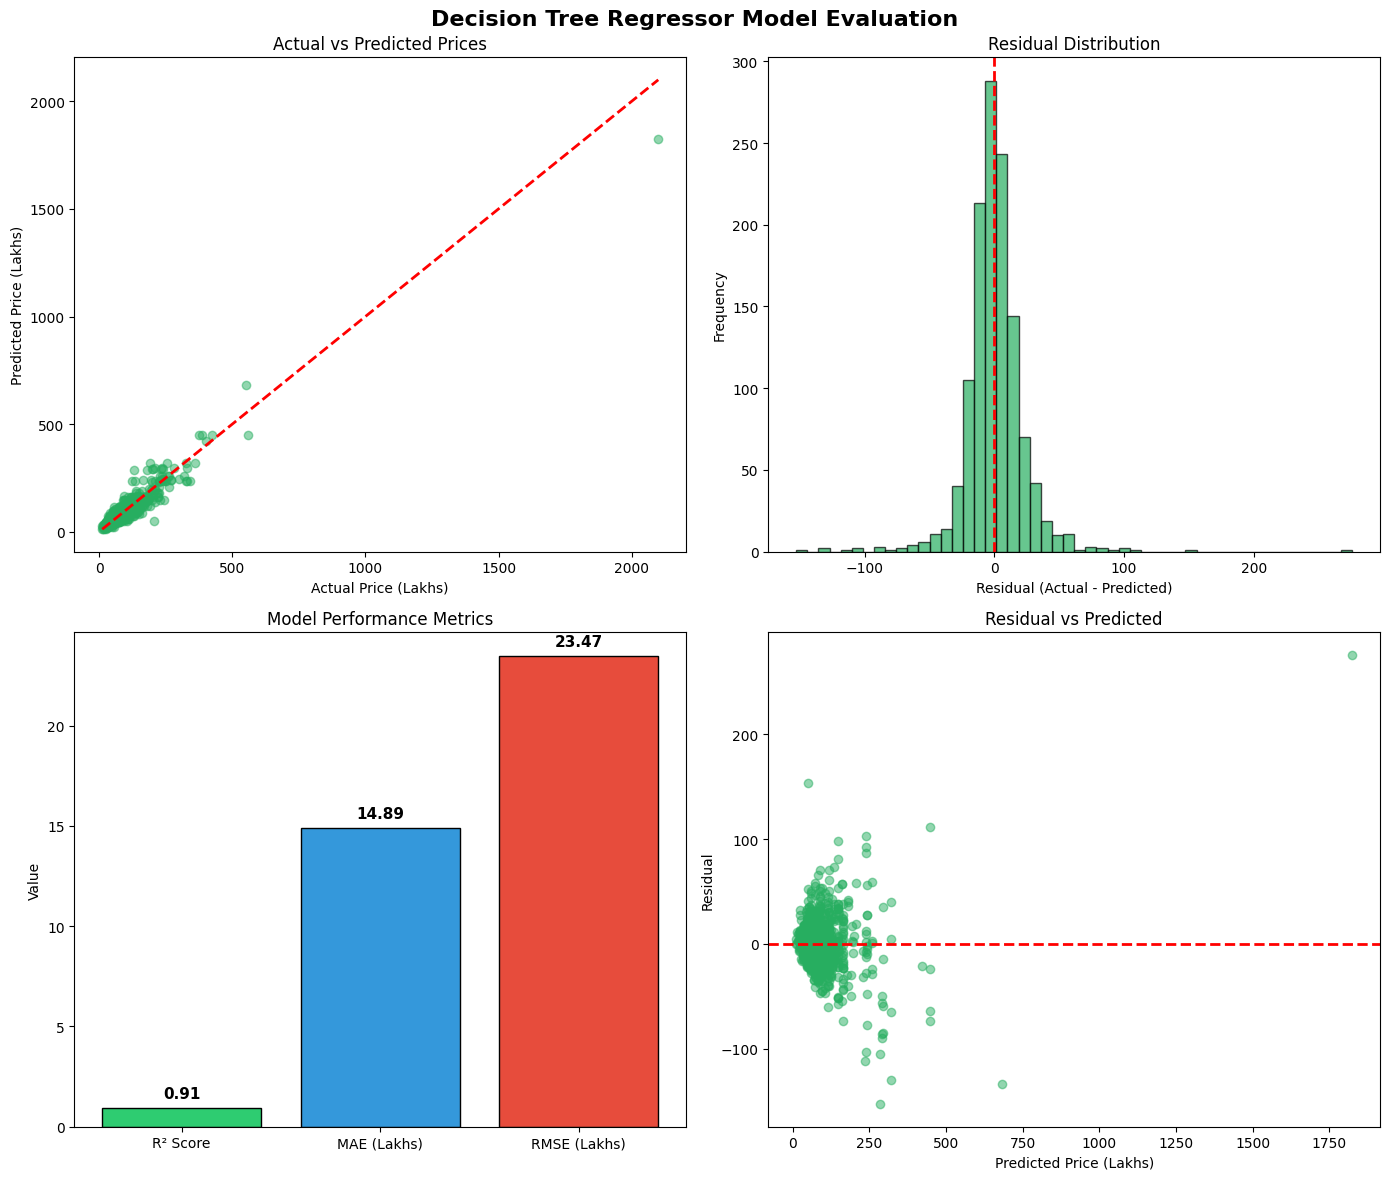

Graph saved to docs/images/decision_tree_results.png


In [8]:
os.makedirs('../docs/images', exist_ok=True)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

axes[0, 0].scatter(y_test, y_pred, alpha=0.5, color='#27ae60')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price (Lakhs)')
axes[0, 0].set_ylabel('Predicted Price (Lakhs)')
axes[0, 0].set_title('Actual vs Predicted Prices')

residuals = y_test - y_pred
axes[0, 1].hist(residuals, bins=50, color='#27ae60', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0, color='red', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Residual (Actual - Predicted)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Residual Distribution')

metrics = ['R² Score', 'MAE (Lakhs)', 'RMSE (Lakhs)']
values = [r2, mae, rmse]
colors = ['#2ecc71', '#3498db', '#e74c3c']
bars = axes[1, 0].bar(metrics, values, color=colors, edgecolor='black')
axes[1, 0].set_ylabel('Value')
axes[1, 0].set_title('Model Performance Metrics')
for bar, val in zip(bars, values):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{val:.2f}', ha='center', fontsize=11, fontweight='bold')

axes[1, 1].scatter(y_pred, residuals, alpha=0.5, color='#27ae60')
axes[1, 1].axhline(y=0, color='red', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Predicted Price (Lakhs)')
axes[1, 1].set_ylabel('Residual')
axes[1, 1].set_title('Residual vs Predicted')

plt.suptitle('Decision Tree Regressor Model Evaluation', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../docs/images/decision_tree_results.png', dpi=150, bbox_inches='tight')
plt.show()
print("Graph saved to docs/images/decision_tree_results.png")

In [9]:
os.makedirs('../models', exist_ok=True)
with open('../models/decision_tree.pkl', 'wb') as f:
    pickle.dump(dt_model, f)
print("Model saved to models/decision_tree.pkl")

Model saved to models/decision_tree.pkl
